<a href="https://colab.research.google.com/github/manalibhoir22/manali/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [310]:
# importing all the required Libraries
import glob
import json
import csv
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import calendar
# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



In [329]:
import numpy as np
import pandas as pd
products = pd.read_excel('data.xlsx')
products.head()

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,1,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,2,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,3,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,4,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,5,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [330]:
products.drop(products.columns[[0,3,4,8]],axis=1,inplace=True)
products.head()

,reviewerID,asin,reviewText,overall,summary,reviewTime
0,A30TL5EWN6DFXT,120401325X,They look good and stick good! I just don't li...,4,Looks Good,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,These stickers work like the review says they ...,5,Really great product.,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,Item arrived in great time and was in perfect ...,4,Cute!,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,"awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,"02 3, 2013"


In [331]:
products.dropna(inplace=True)

In [332]:
popular_products = pd.DataFrame(products.groupby('asin')['overall'].count())
popular_products 

,overall
asin,
120401325X,7
3998899561,10
6073894996,37
7532385086,9
7887421268,13
...,...
B00LH1QZR8,5
B00LH1R3C4,5
B00LH1R5HW,5


Text(0, 0.5, 'Number of Reviews')

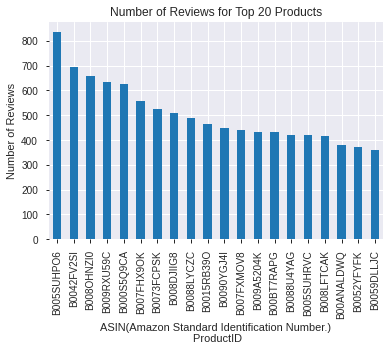

In [333]:
# Numbers of review Vs asin
##########################################
## PLOT NUMBER OF REVIEWS FOR TOP 20 PRODUCTS  i.e. 20 products with highest no. of reviews
##########################################
popular_products = pd.DataFrame(products.groupby('asin')['overall'].count())
most_popular = popular_products.sort_values('overall',ascending=False)
most_popular.head(20).plot(kind = "bar",legend = None)
plt.title("Number of Reviews for Top 20 Products")
plt.xlabel('ASIN(Amazon Standard Identification Number.)\n ProductID')
plt.ylabel('Number of Reviews')


Text(0, 0.5, 'Number of Reviews')

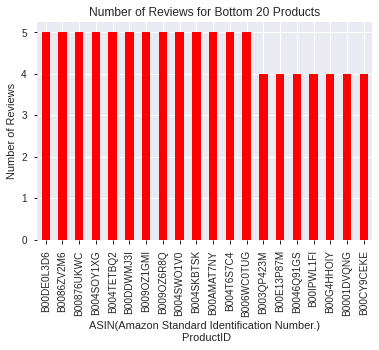

In [336]:
##########################################
## PLOT NUMBER OF REVIEWS FOR bottom 20 PRODUCTS  i.e. 20 products with lowest no. of reviews
##########################################
popular_products = pd.DataFrame(products.groupby('asin')['overall'].count())
most_popular = popular_products.sort_values('overall',ascending=False)
most_popular[-20:].plot(kind = "bar",legend=None,color='red')
plt.title("Number of Reviews for Bottom 20 Products")
plt.xlabel('ASIN(Amazon Standard Identification Number.)\n ProductID')
plt.ylabel('Number of Reviews')

In [341]:
products.groupby('asin')['overall'].count().sort_values(ascending=False).head()

asin
B005SUHPO6    836
B0042FV2SI    694
B008OHNZI0    657
B009RXU59C    633
B000S5Q9CA    628
Name: overall, dtype: int64

In [342]:
def sentiment(n):
    return 1 if n >= 4 else 0
products['sentiment'] = products['overall'].apply(sentiment)
products.head()

,reviewerID,asin,reviewText,overall,summary,reviewTime,sentiment
0,A30TL5EWN6DFXT,120401325X,They look good and stick good! I just don't li...,4,Looks Good,"05 21, 2014",1
1,ASY55RVNIL0UD,120401325X,These stickers work like the review says they ...,5,Really great product.,"01 14, 2014",1
2,A2TMXE2AFO7ONB,120401325X,These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,"06 26, 2014",1
3,AWJ0WZQYMYFQ4,120401325X,Item arrived in great time and was in perfect ...,4,Cute!,"10 21, 2013",1
4,ATX7CZYFXI1KW,120401325X,"awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,"02 3, 2013",1


In [370]:
##########################################
## DESCRIPTIVE STATISTICS
##########################################

print ("================================================")

### Total reviews
total = len(products)
print ("Number of reviews: ",total)
print ()

### How many unique reviewers?
print ("Number of unique reviewers: ",len(products.reviewerID.unique()))
reviewer_prop = float(len(products.reviewerID.unique())/total)
print ("Prop of unique reviewers: ",round(reviewer_prop,3))
print ()

### How many unique products?
print ("Number of unique products: ", len(products.asin.unique()))
product_prop = float(len(products.asin.unique())/total)
print ("Prop of unique products: ",round(product_prop,3))
print ()

### Average star score
print ("Average overall rating score: ",round(products.overall.mean(),3))

##Total reviews for each Ratings
print("Total No. of ratings for Each Rating:\n", products['overall'].value_counts())

## Total Positive and Negative Rating
print("Total POstive and negative Ratings:\n",products['sentiment'].value_counts())

# Review number per unique customer
print('\nReview per customer: {}'.format((len(products)/len(products['reviewerID'].unique()))))      

# Review number per unique product 
print('\nReview per product: {}'.format((len(products)/len(products['asin'].unique()))))


print ("================================================")

products['overall'].describe()

Number of reviews:  194339

Number of unique reviewers:  27879
Prop of unique reviewers:  0.143

Number of unique products:  10429
Prop of unique products:  0.054

Average overall rating score:  4.13
Total No. of ratings for Each Rating:
 5    108601
4     39974
3     21436
1     13269
2     11059
Name: overall, dtype: int64
Total POstive and negative Ratings:
 1    148575
0     45764
Name: sentiment, dtype: int64

Review per customer: 6.970802396068725

Review per product: 18.634480774762682


count    194339.000000
mean          4.129876
std           1.222451
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

In [386]:
products.overall.skew()

-1.3327588556809082

In [374]:
# These are the standard imports that we will use all the time.
import os                             # Library to do things on the filesystem
import pandas as pd                   # Super cool general purpose data handling library
import matplotlib.pyplot as plt       # Standard plotting library
import numpy as np                    # General purpose math library
from IPython.display import display   # A notebook function to display more complex data (like tables)
import scipy.stats as stats           # Scipy again

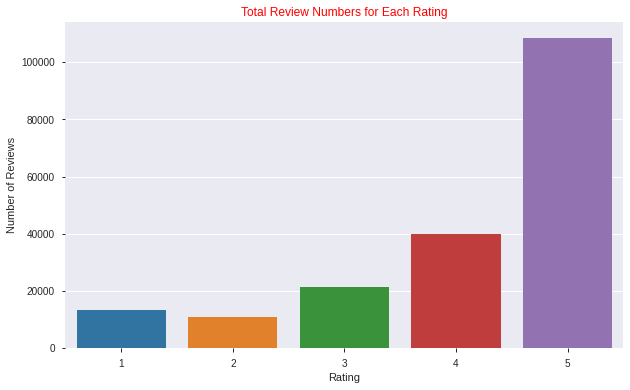

5    108601
4     39974
3     21436
1     13269
2     11059
Name: overall, dtype: int64

In [389]:
# Number of Review Vs Ratings
import seaborn as sns
plt.figure(figsize = (10,6))
sns.countplot(products['overall'])
plt.title('Total Review Numbers for Each Rating', color='r')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
products['overall'].value_counts()

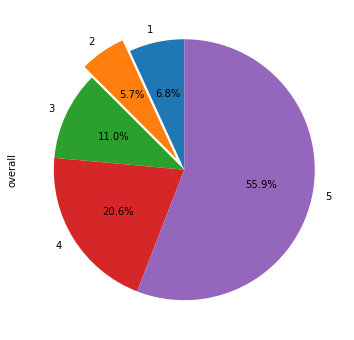

In [72]:
#Distribution of ratings Vs Number of reviews
%matplotlib inline
plt.figure(figsize = (10,6))

products.groupby('overall').overall.count()
product.groupby('overall').overall.count().plot(kind='pie',autopct='%1.1f%%',startangle=90,explode=(0,0.1,0,0,0),)

In [75]:
#FROM PIECHART:The ratings were divided into two categories. The rating below 3 were classified as “bad” and the remaining ratings were grouped as “good”. The distribution of rating class vs number of reviews is shown below. It indicates about 50000 reviews were identified as good rating.

In [391]:
#data=reviewText_dataset.copy()
word_count=[]
for s1 in products.reviewText:
     word_count.append(len(str(s1).split()))

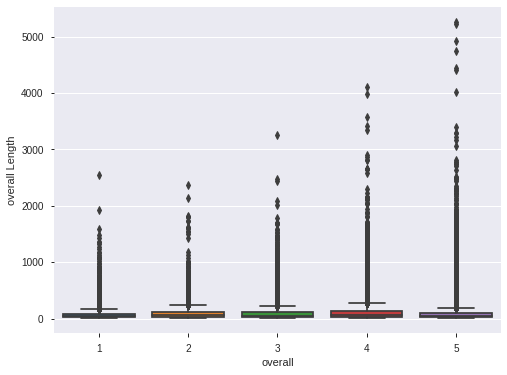

In [392]:
plt.figure(figsize = (8,6))

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="overall",y=word_count,data=products)
plt.xlabel('overall')
plt.ylabel('overall Length')

plt.show()

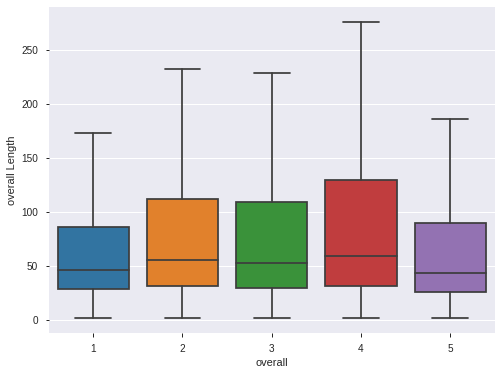

In [393]:
#Since there are outliers in the above boxplot we are not able to clearly visualize.So remove the outliers 
#Which Rating got Highest Number of Review Length?

plt.figure(figsize = (8,6))

sns.boxplot(x="overall",y=word_count,data=products,showfliers=False)
plt.xlabel('overall')
plt.ylabel('overall Length')

plt.show()

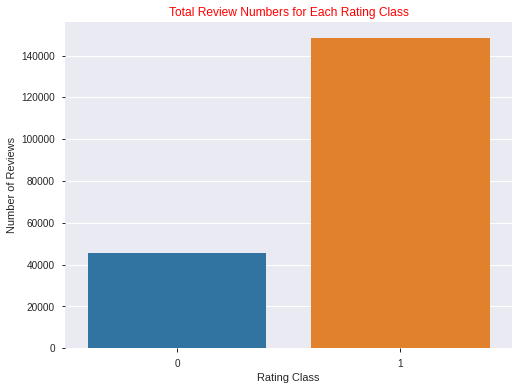

1    148575
0     45764
Name: sentiment, dtype: int64

In [394]:
# Total numbers of ratings product reviews
plt.figure(figsize = (8,6))
sns.countplot(products['sentiment'])
plt.title('Total Review Numbers for Each Rating Class', color='r')
plt.xlabel('Rating Class')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
products['sentiment'].value_counts()

In [416]:
#Character and word length distribution

In [400]:
Review_Length=products[['asin','reviewText']]


In [401]:
products['reviewText']=products['reviewText'].apply(str)

In [402]:
# Word count
Review_Length['Word_Length']=Review_Length['reviewText'].apply(lambda x: len(x.split()))

In [403]:
# character count
Review_Length['Character_Length']=Review_Length['reviewText'].apply(lambda x: len(x))

In [404]:
Review_Length.head()

,asin,reviewText,Word_Length,Character_Length
0,120401325X,They look good and stick good! I just don't li...,37,189
1,120401325X,These stickers work like the review says they ...,32,160
2,120401325X,These are awesome and make my phone look so st...,34,166
3,120401325X,Item arrived in great time and was in perfect ...,51,275
4,120401325X,"awesome! stays on, and looks great. can be use...",23,135


In [405]:
Char_Review_Length=Review_Length.groupby(pd.cut(Review_Length.Character_Length,np.arange(0, 1501, 100))).count()
Char_Review_Length=Char_Review_Length.rename(columns={'Character_Length':'Count'})
result_Char_Review_Length=Char_Review_Length.reset_index()

Word_Review_Length=Review_Length.groupby(pd.cut(Review_Length.Word_Length,np.arange(0, 801, 100))).count()
Word_Review_Length=Word_Review_Length.rename(columns={'Word_Length':'Count'})
result_Word_Review_Length=Word_Review_Length.reset_index()

In [413]:
result_Char_Review_Length[["Character_Length","Count"]]

,Character_Length,Count
0,"(0, 100]",8341
1,"(100, 200]",71714
2,"(200, 300]",31110
3,"(300, 400]",18846
4,"(400, 500]",12519
5,"(500, 600]",8924
6,"(600, 700]",6789
7,"(700, 800]",5379
8,"(800, 900]",4410
9,"(900, 1000]",3586


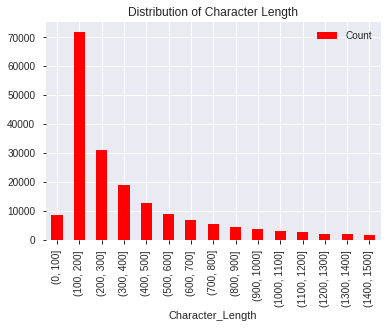

In [414]:
result_Char_Review_Length.plot(x="Character_Length",y="Count",kind="bar",title="Distribution of Character Length",color='r')
plt.show()

In [410]:
result_Word_Review_Length[["Word_Length","Count"]]

,Word_Length,Count
0,"(0, 100]",145780
1,"(100, 200]",28351
2,"(200, 300]",10133
3,"(300, 400]",4625
4,"(400, 500]",2231
5,"(500, 600]",1161
6,"(600, 700]",682
7,"(700, 800]",393


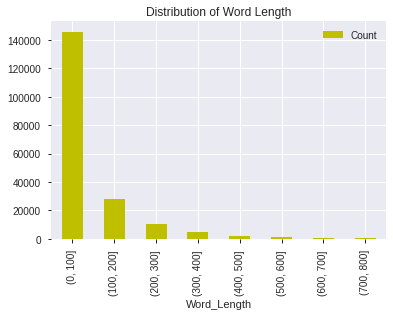

In [421]:
result_Word_Review_Length.plot(x="Word_Length",y="Count",kind="bar",title="Distribution of Word Length",color='y')
plt.show()

In [426]:
products['reviewTime']= pd.to_datetime(products['reviewTime'])

In [429]:
products['Month']=products['reviewTime'].dt.month

In [431]:
products['Year']=products['reviewTime'].dt.year

In [432]:
Yearly=products.groupby(['Year'])['asin'].count().reset_index()

In [435]:
Yearly=Yearly.rename(columns={'asin': 'Number_Of_Reviews'})
Yearly

,Year,Number_Of_Reviews
0,2001,1
1,2002,1
2,2003,2
3,2004,44
4,2005,130
5,2006,240
6,2007,388
7,2008,677
8,2009,1307
9,2010,3427


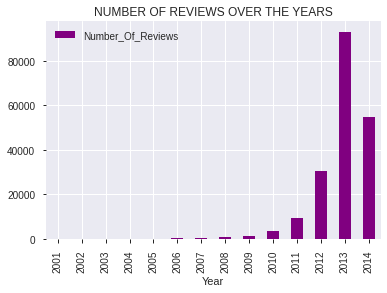

In [458]:
Yearly.plot(x="Year",y="Number_Of_Reviews",kind="bar",title="NUMBER OF REVIEWS OVER THE YEARS",color="purple")
plt.show()

In [438]:
Monthly=products.groupby(['Month'])['asin'].count().reset_index()

In [439]:
# Replacing digits of 'Month' column in 'Monthly' dataframe with words using 'Calendar' library
Monthly['Month'] = Monthly['Month'].apply(lambda x: calendar.month_name[x])
Monthly=Monthly.rename(columns={'asin':'Number_of_Reviews'})

In [441]:
Monthly

,Month,Number_of_Reviews
0,January,21132
1,February,17274
2,March,17845
3,April,16821
4,May,17364
5,June,17439
6,July,18305
7,August,11504
8,September,9951
9,October,12227


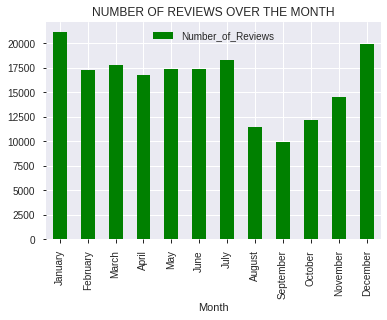

In [442]:
Monthly.plot(x="Month",y="Number_of_Reviews",kind="bar",title="NUMBER OF REVIEWS OVER THE MONTH",color="g")
plt.show()

In [444]:
AvgRatingProd=products.groupby('asin')['overall'].mean().reset_index()

In [445]:
result_AvgRatingProd=AvgRatingProd.groupby(pd.cut(AvgRatingProd.overall,np.arange(0, 5.1, 1))).count()
result_AvgRatingProd=result_AvgRatingProd.rename(columns={'overall':'Count'})
result_AvgRatingProd=result_AvgRatingProd.reset_index()

In [446]:
result_AvgRatingProd[['overall','Count']]

,overall,Count
0,"(0.0, 1.0]",1
1,"(1.0, 2.0]",31
2,"(2.0, 3.0]",495
3,"(3.0, 4.0]",3892
4,"(4.0, 5.0]",6010


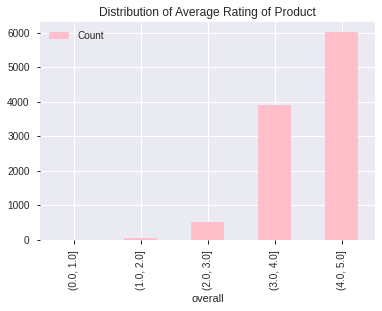

In [457]:
result_AvgRatingProd.plot(x="overall",y="Count",kind="bar",title="Distribution of Average Rating of Product",color='pink')
plt.show()

In [450]:
# Print number of unique Cell Phone and Accessories products in the dataset
print('Number of unique Cell Phone and Accessories products: {}'.format(len(products['asin'].unique())))

Number of unique Cell Phone and Accessories products: 10429


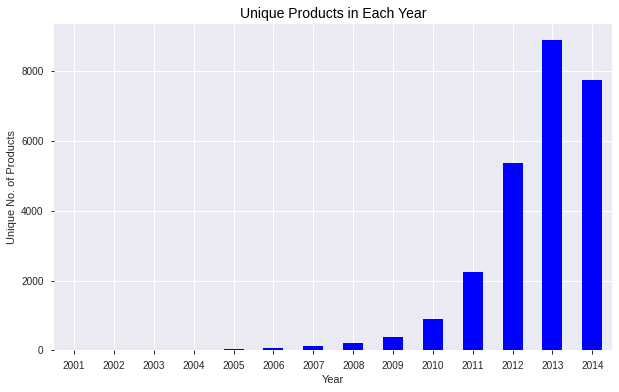

Year
2001       1
2002       1
2003       1
2004      15
2005      34
2006      72
2007     128
2008     214
2009     388
2010     911
2011    2243
2012    5380
2013    8907
2014    7756
Name: asin, dtype: int64


In [456]:
# How many unique products in each year?
unique_prod = products.groupby('Year')['asin'].nunique()

# Plot unique product numbers in each year
plt.figure(figsize = (10,6))
unique_prod.plot(kind='bar', color = 'b', rot =0)
plt.title('Unique Products in Each Year', color = 'black', size = 14)
plt.xlabel('Year')
plt.ylabel('Unique No. of Products')
plt.show()

# Print unique product numbers in each year
print(unique_prod)

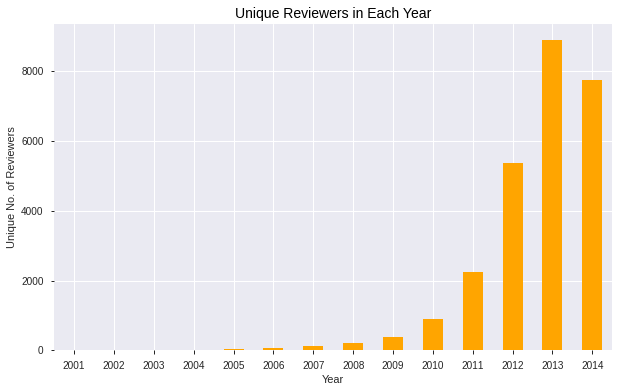

Year
2001        1
2002        1
2003        2
2004       37
2005      102
2006      182
2007      318
2008      528
2009      950
2010     2208
2011     5163
2012    11776
2013    22761
2014    16476
Name: reviewerID, dtype: int64


In [455]:
# How many unique reviewers in each year?
unique_rev = products.groupby('Year')['reviewerID'].nunique()

# Plot unique product numbers in each year
plt.figure(figsize = (10,6))
unique_prod.plot(kind='bar', color = 'orange', rot =0)
plt.title('Unique Reviewers in Each Year', color = 'black', size = 14)
plt.xlabel('Year')
plt.ylabel('Unique No. of Reviewers')
plt.show()

# Print unique product numbers in each year
print(unique_rev)